<a href="https://colab.research.google.com/github/mbk-dev/publications_RUS/blob/main/10%20us%20stocks%20moex.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

Статья [Индексные фонды американских акций на Мосбирже](https://rostsber.ru/publish/stocks/us_stocks_funds_moex.html) на блоге "Рост Сбережений"

In [ ]:
!pip install okama

In [1]:
import matplotlib.pyplot as plt

import okama as ok

## Индексные фонды
- FXUS 0,90% **Solactive GBS United States Large & Mid Cap Index NTR** (531)  
- AKSP 1,00% iShares Core S&P 500 ETF  
- SBSP 1,00%  
- VTBA 0,81% iShares Core S&P 500 UCITS ETF
- TSPX 0,79%  
- RCUS 0,99% (запущен в сентябре 2021)    

--------------------------------

### FXUS vs SP500 TR

In [2]:
finex = ok.AssetList(['SP500TR.INDX', 'FXUS.MOEX'], ccy='USD', first_date='2016-10', inflation=True)
finex

assets           [SP500TR.INDX, FXUS.MOEX]
currency                               USD
first_date                         2016-10
last_date                          2021-09
period_length            5 years, 0 months
inflation                         USD.INFL
dtype: object

<AxesSubplot:>

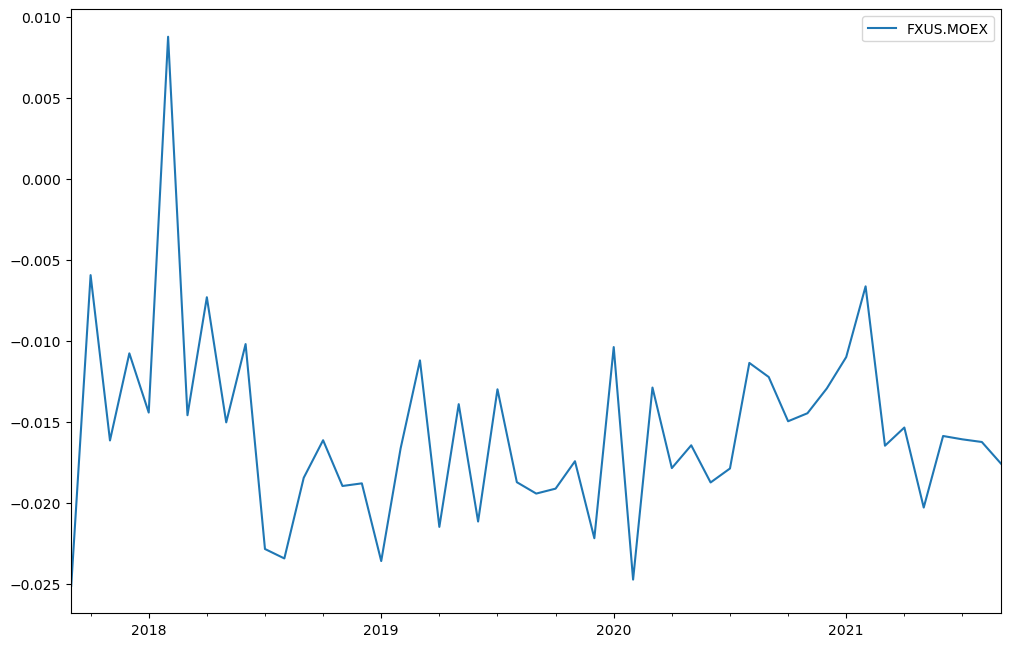

In [21]:
finex.tracking_difference_annualized.plot()

In [23]:
finex.tracking_difference_annualized.tail()

,FXUS.MOEX
2021-05,-0.020300
2021-06,-0.015883
2021-07,-0.016090
2021-08,-0.016253
2021-09,-0.017605


<AxesSubplot:>

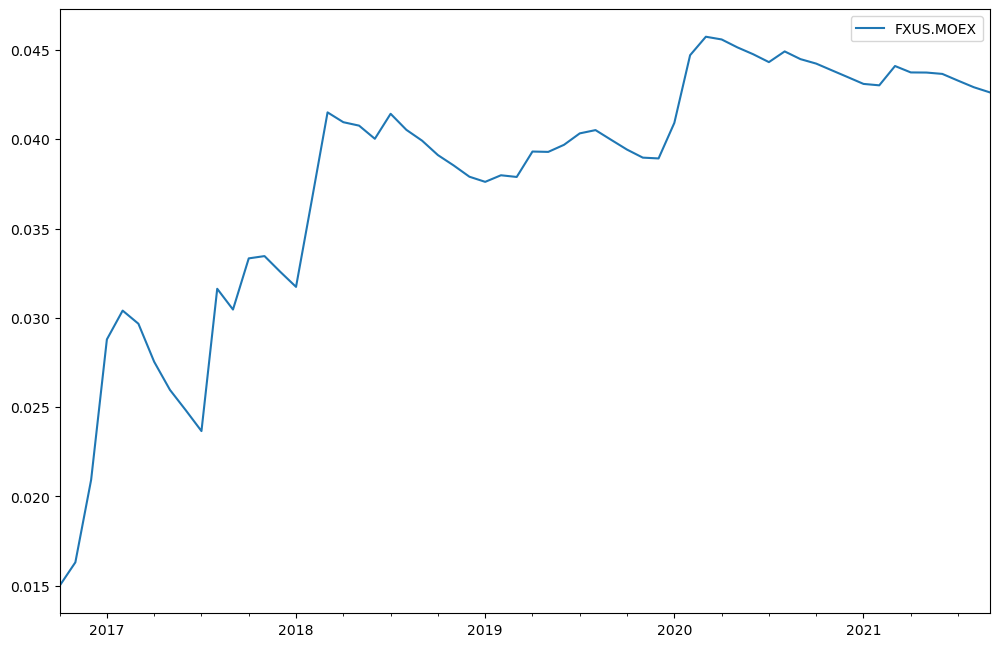

In [29]:
finex.tracking_error.plot()

In [45]:
finex.tracking_error.tail()

,FXUS.MOEX
2021-05,0.043734
2021-06,0.043658
2021-07,0.043280
2021-08,0.042912
2021-09,0.042628


In [28]:
finex.index_beta.tail()

,FXUS.MOEX
2021-05,0.937407
2021-06,0.935482
2021-07,0.935507
2021-08,0.935561
2021-09,0.935125


In [41]:
al = ok.AssetList(['SP500TR.INDX', 'VOO.US', 'FXUS.MOEX'])
al

assets           [SP500TR.INDX, VOO.US, FXUS.MOEX]
currency                                       USD
first_date                                 2013-11
last_date                                  2021-09
period_length                   7 years, 11 months
inflation                                 USD.INFL
dtype: object

<AxesSubplot:>

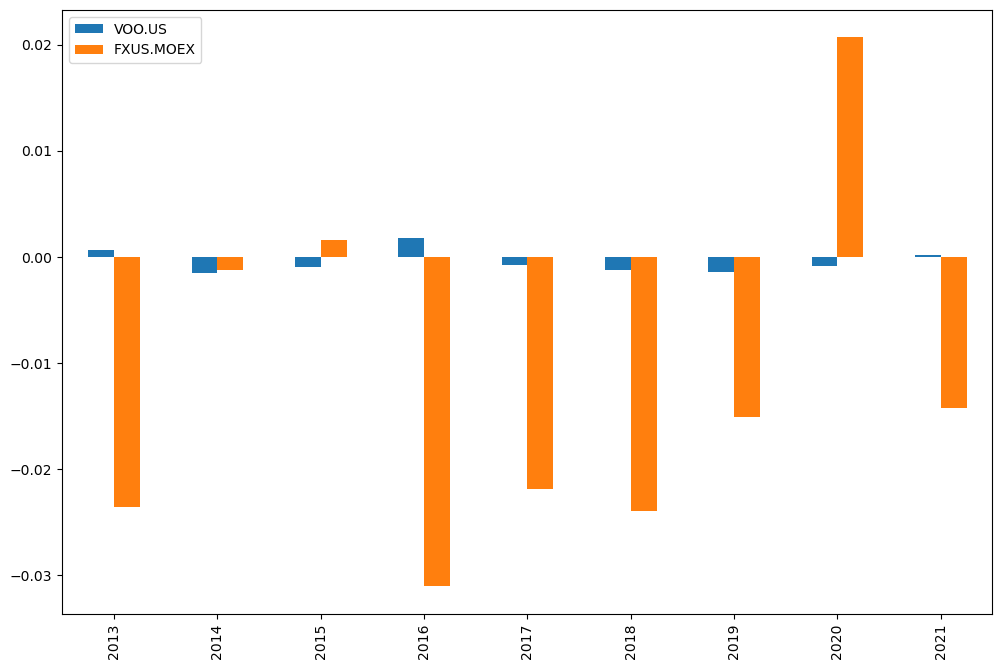

In [45]:
al.tracking_difference_annual.plot(kind='bar')

### Основные фонды

In [2]:
main = ok.AssetList(['SP500TR.INDX', 'FXUS.MOEX', 'SBSP.MOEX', 'AKSP.MOEX', 'VTBA.MOEX' ], ccy='USD', inflation=False)
main

assets           [SP500TR.INDX, FXUS.MOEX, SBSP.MOEX, AKSP.MOEX...
currency                                                       USD
first_date                                                 2019-07
last_date                                                  2021-11
period_length                                    2 years, 5 months
inflation                                                     None
dtype: object

In [3]:
main.tracking_difference.tail()

,FXUS.MOEX,SBSP.MOEX,AKSP.MOEX,VTBA.MOEX
2021-07,0.008489,-0.054712,-0.050896,-0.063566
2021-08,0.008854,-0.055675,-0.055591,-0.058269
2021-09,-0.000667,-0.051281,-0.057476,-0.061346
2021-10,0.000574,-0.073719,-0.063410,-0.074310
2021-11,0.006022,-0.061514,-0.069461,-0.066462


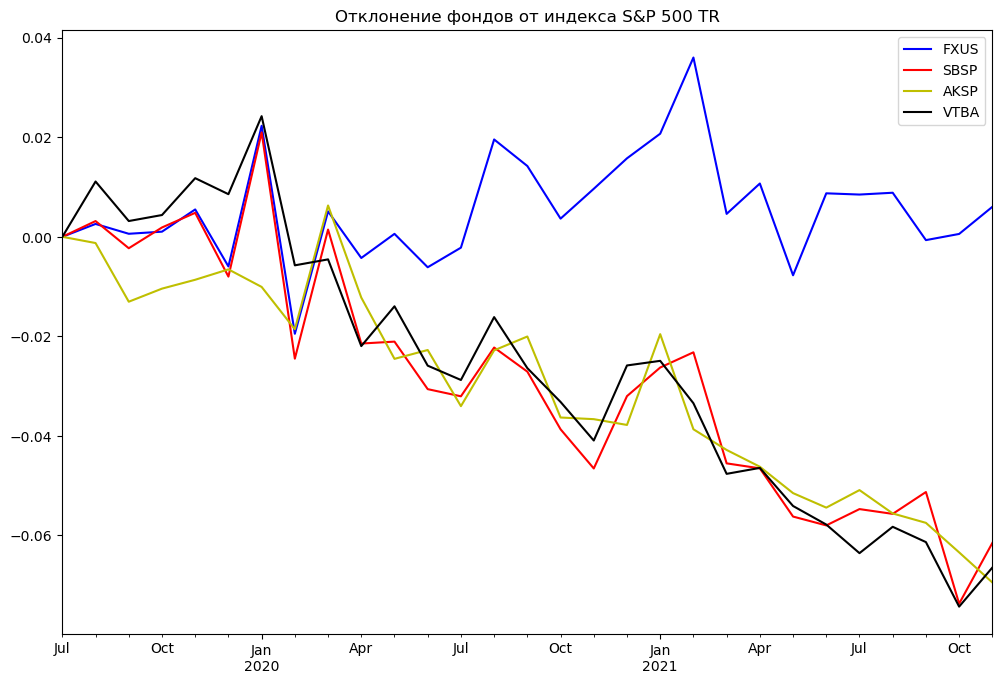

In [5]:
main.tracking_difference.plot(color=['b', 'r', 'y', 'k'])
plt.legend(main.tickers[1:])
plt.title('Отклонение фондов от индекса S&P 500 TR');

In [6]:
main.tracking_difference_annualized.tail(1)

,FXUS.MOEX,SBSP.MOEX,AKSP.MOEX,VTBA.MOEX
2021-11,0.002488,-0.02501,-0.028178,-0.026984


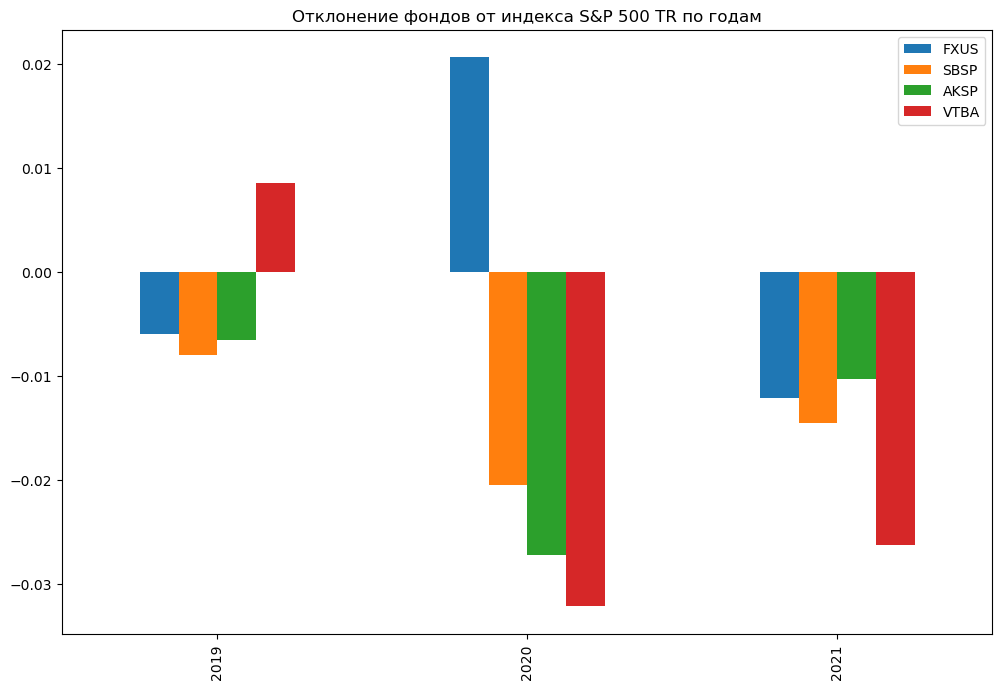

In [5]:
main.tracking_difference_annual.plot(kind='bar')
plt.legend(main.tickers[1:])
plt.title('Отклонение фондов от индекса S&P 500 TR по годам');

<AxesSubplot:>

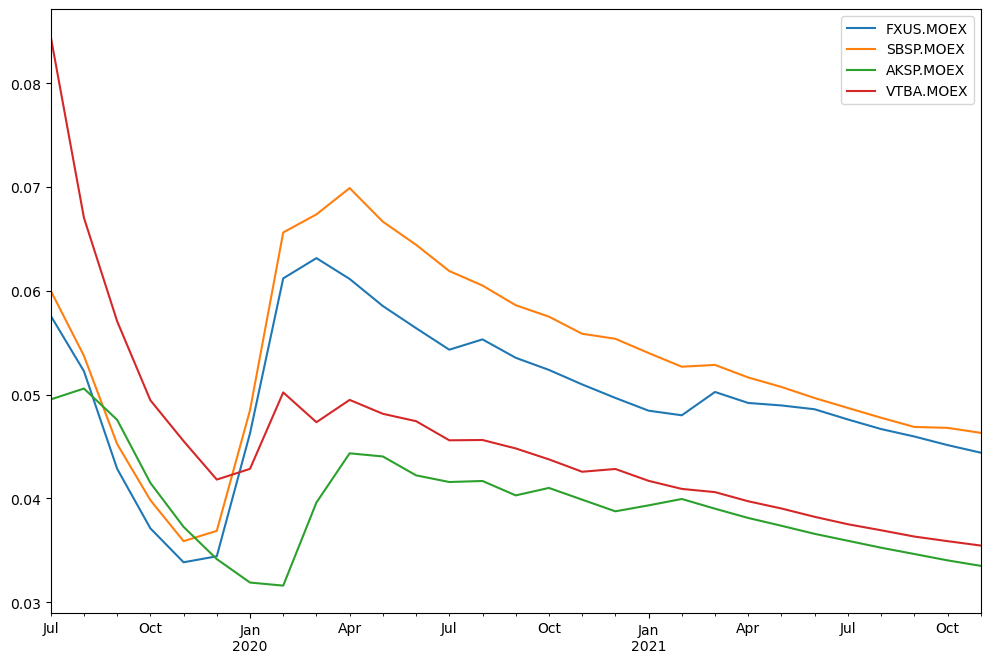

In [7]:
main.tracking_error.plot()

In [9]:
main.tracking_error.tail(1)

,FXUS.MOEX,SBSP.MOEX,AKSP.MOEX,VTBA.MOEX
2021-11,0.044409,0.046318,0.033508,0.035463


In [12]:
main.index_beta.tail(1)

,FXUS.MOEX,SBSP.MOEX,AKSP.MOEX,VTBA.MOEX
2021-11,0.921558,0.959948,1.015928,0.938528


In [15]:
main.index_beta.tail(1).to_csv('beta.csv')

### NEW 2021

Показатели нового фонда TSPX (УК Тинькофф).

In [16]:
new = ok.AssetList(['SP500TR.INDX', 'AKSP.MOEX', 'TSPX.MOEX'], inflation=False)  # 'OPNS.MOEX', 'RCUS.MOEX'  - missing
new

assets           [SP500TR.INDX, AKSP.MOEX, TSPX.MOEX]
currency                                          USD
first_date                                    2021-01
last_date                                     2021-11
period_length                      0 years, 11 months
inflation                                        None
dtype: object

In [17]:
new.tracking_difference.tail(1)

,AKSP.MOEX,TSPX.MOEX
2021-11,-0.017084,0.018685


In [20]:
new.tracking_error.tail(1)

,AKSP.MOEX,TSPX.MOEX
2021-11,0.022397,0.049878
